# Define the system  

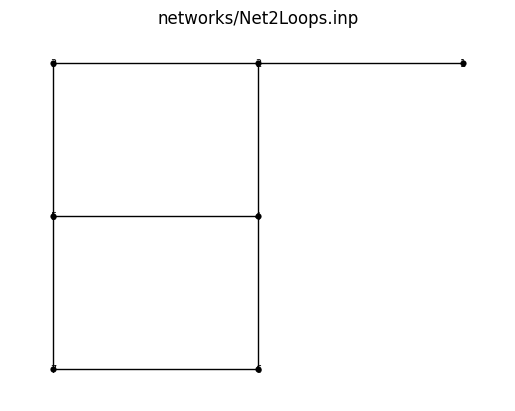

<Axes: title={'center': 'networks/Net2Loops.inp'}>

In [1]:
import wntr
import wntr_quantum

# Create a water network model
inp_file = 'networks/Net0.inp'
inp_file = 'networks/Net2Loops.inp'
wn = wntr.network.WaterNetworkModel(inp_file)

# Graph the network
wntr.graphics.plot_network(wn, title=wn.name, node_labels=True)


## Run with the original Cholesky EPANET simulator

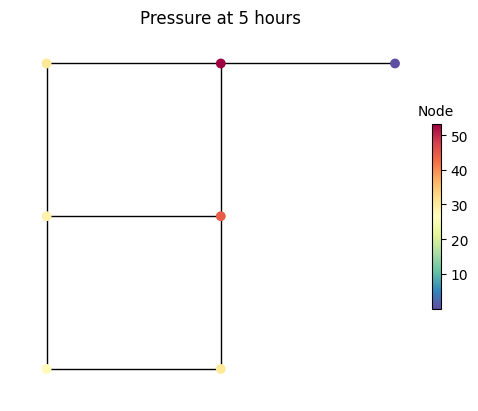

<Axes: title={'center': 'Pressure at 5 hours'}>

In [2]:
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()
# Plot results on the network
pressure_at_5hr = results.node['pressure'].loc[0, :]
wntr.graphics.plot_network(wn, node_attribute=pressure_at_5hr, node_size=50,
                        title='Pressure at 5 hours', node_labels=False)

## Run with our custom Cholesky EPANET solver 
we use the default solver of the QuantumWNTRSimulator, that uses a LU solver, a s a benchmark of the calculation

/home/nico/QuantumApplicationLab/vitens/wntr-quantum/wntr_quantum/epanet/Linux/libepanet22_amd64.so
[[ 0.237 -0.197  0.     0.     0.    -0.04 ]
 [-0.197  1.072 -0.875  0.     0.     0.   ]
 [ 0.    -0.875  2.183 -1.268  0.    -0.04 ]
 [ 0.     0.    -1.268  2.636 -0.097  0.   ]
 [ 0.     0.     0.    -0.097  0.137 -0.04 ]
 [-0.04   0.    -0.04   0.    -0.04   0.119]]
X [658.381 669.426 675.172 680.968 663.65  644.233] 3.2627186193895914e-13
[[ 0.074 -0.055  0.     0.     0.    -0.019]
 [-0.055  0.32  -0.265  0.     0.     0.   ]
 [ 0.    -0.265  0.617 -0.344  0.    -0.008]
 [ 0.     0.    -0.344  0.635 -0.023  0.   ]
 [ 0.     0.     0.    -0.023  0.035 -0.011]
 [-0.019  0.    -0.008  0.    -0.011  0.038]]
X [613.591 641.499 653.909 666.823 626.029 588.157] 3.751962533617434e-14
[[ 0.065 -0.051  0.     0.     0.    -0.014]
 [-0.051  0.307 -0.256  0.     0.     0.   ]
 [ 0.    -0.256  0.608 -0.343  0.    -0.009]
 [ 0.     0.    -0.343  0.634 -0.024  0.   ]
 [ 0.     0.     0.    -0.024

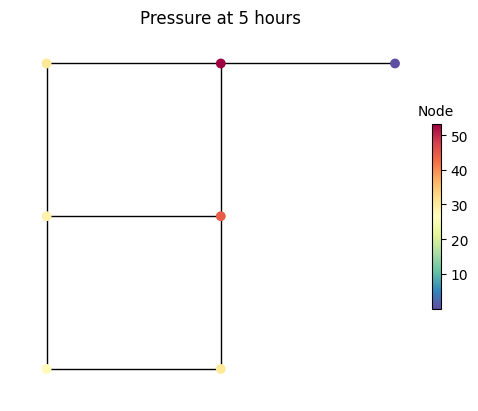

<Axes: title={'center': 'Pressure at 5 hours'}>

In [3]:
sim = wntr_quantum.sim.QuantumEpanetSimulator(wn)
results = sim.run_sim()
# Plot results on the network
pressure_at_5hr = results.node['pressure'].loc[0, :]
wntr.graphics.plot_network(wn, node_attribute=pressure_at_5hr, node_size=50,
                        title='Pressure at 5 hours', node_labels=False)

## Run with our custum SPLU EPANET Solver

/home/nico/QuantumApplicationLab/vitens/wntr-quantum/wntr_quantum/epanet/Linux/libepanet22_amd64.so
X [658.38081572 669.42611395 675.17224041 680.96758328 663.64979716
 644.23288286] 2.330239380989508e-13
X [613.59118575 641.49943197 653.90948761 666.82326541 626.02891852
 588.15663128] 6.947974028089038e-14
X [613.70616475 641.55998392 653.9412754  666.82274163 625.54267027
 586.65202112] 4.7799195062779496e-14
X [613.70721395 641.56090983 653.94210871 666.82330067 625.54301238
 586.64891514] 2.4269485475879503e-14


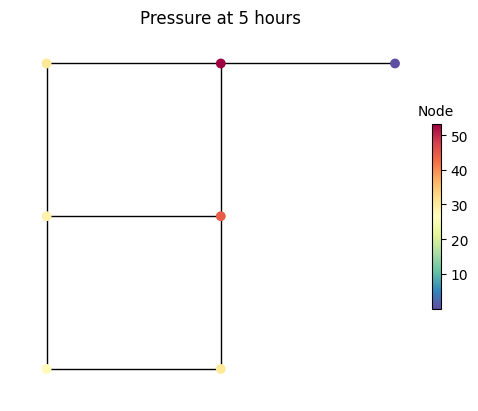

<Axes: title={'center': 'Pressure at 5 hours'}>

In [4]:
from quantum_newton_raphson.splu_solver import SPLU_SOLVER
sim = wntr_quantum.sim.QuantumEpanetSimulator(wn, linear_solver=SPLU_SOLVER())
results = sim.run_sim(linear_solver=SPLU_SOLVER())
# Plot results on the network
pressure_at_5hr = results.node['pressure'].loc[0, :]
wntr.graphics.plot_network(wn, node_attribute=pressure_at_5hr, node_size=50,
                        title='Pressure at 5 hours', node_labels=False)

In [1]:
import numpy as np 
A = 0.1 * np.random.rand(6,6)
A += np.diag(np.random.rand(6))
# A = A + A.T
b = np.random.rand(6)

In [2]:
from wntr_quantum.sim.epanet import CholeskySolver 
import scipy.sparse as spsp 
solver = CholeskySolver()
res = solver(spsp.csc_array(A), b)
res.solution 

array([0.16 , 1.613, 0.376, 1.077, 0.87 , 0.036])

In [3]:
A@res.solution - b

array([ 1.042e-01,  6.158e-02,  4.203e-02, -1.726e-02,  5.650e-04,  2.776e-17])

In [4]:
L = np.linalg.cholesky(A)

In [5]:
L@L.T

array([[3.986e-01, 2.115e-02, 6.151e-02, 4.108e-02, 6.987e-04, 7.045e-02],
       [2.115e-02, 4.464e-01, 1.220e-02, 1.050e-02, 1.806e-02, 2.902e-02],
       [6.151e-02, 1.220e-02, 8.512e-01, 5.420e-02, 4.585e-02, 7.995e-02],
       [4.108e-02, 1.050e-02, 5.420e-02, 4.426e-01, 6.297e-02, 1.687e-02],
       [6.987e-04, 1.806e-02, 4.585e-02, 6.297e-02, 7.673e-01, 6.579e-03],
       [7.045e-02, 2.902e-02, 7.995e-02, 1.687e-02, 6.579e-03, 4.831e-01]])

In [6]:
A

array([[3.986e-01, 4.713e-02, 6.075e-02, 9.024e-02, 1.359e-02, 2.766e-02],
       [2.115e-02, 4.464e-01, 1.363e-02, 1.192e-02, 8.647e-02, 2.994e-02],
       [6.151e-02, 1.220e-02, 8.512e-01, 7.766e-02, 6.810e-02, 7.459e-03],
       [4.108e-02, 1.050e-02, 5.420e-02, 4.426e-01, 4.238e-02, 3.496e-02],
       [6.987e-04, 1.806e-02, 4.585e-02, 6.297e-02, 7.673e-01, 2.241e-02],
       [7.045e-02, 2.902e-02, 7.995e-02, 1.687e-02, 6.579e-03, 4.831e-01]])

In [12]:
A[np.tril_indices(6, k=-1)]

array([0.021, 0.062, 0.012, 0.041, 0.011, 0.054, 0.001, 0.018, 0.046, 0.063, 0.07 , 0.029, 0.08 , 0.017, 0.007])

In [14]:
A[np.triu_indices(6,k=1)] = A[np.tril_indices(6, k=-1)]


In [15]:
A

array([[3.986e-01, 2.115e-02, 6.151e-02, 1.220e-02, 4.108e-02, 1.050e-02],
       [2.115e-02, 4.464e-01, 5.420e-02, 6.987e-04, 1.806e-02, 4.585e-02],
       [6.151e-02, 1.220e-02, 8.512e-01, 6.297e-02, 7.045e-02, 2.902e-02],
       [4.108e-02, 1.050e-02, 5.420e-02, 4.426e-01, 7.995e-02, 1.687e-02],
       [6.987e-04, 1.806e-02, 4.585e-02, 6.297e-02, 7.673e-01, 6.579e-03],
       [7.045e-02, 2.902e-02, 7.995e-02, 1.687e-02, 6.579e-03, 4.831e-01]])

In [17]:
import numpy as np
A = np.random.rand(4,4)

In [18]:
A

array([[0.006, 0.558, 0.673, 0.387],
       [0.023, 0.286, 0.941, 0.823],
       [0.435, 0.719, 0.842, 0.309],
       [0.116, 0.66 , 0.231, 0.174]])

In [19]:
diag = np.diag(A)
A = A - np.diag(diag)

In [21]:
A[np.triu_indices(4,k=1)] = 0

In [22]:
A

array([[0.   , 0.   , 0.   , 0.   ],
       [0.023, 0.   , 0.   , 0.   ],
       [0.435, 0.719, 0.   , 0.   ],
       [0.116, 0.66 , 0.231, 0.   ]])

In [23]:
A = A+A.T

In [24]:
A += np.diag(diag)

In [25]:
A

array([[0.006, 0.023, 0.435, 0.116],
       [0.023, 0.286, 0.719, 0.66 ],
       [0.435, 0.719, 0.842, 0.231],
       [0.116, 0.66 , 0.231, 0.174]])